# CLASSIFICATION PROJECT FOR LOAN

**IMPORTING THE LIBRARIES**

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

**LOADING / INTERPRETING DATASET**

In [20]:
dataset = pd.read_csv('loan_train.csv')
dataset.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [8]:
dataset.shape

(346, 10)

The dataset above illustrates 346 individuals whose loan are PAID OFF or ONGOING

In [18]:
dataset["loan_status"].unique()

array(['PAIDOFF', 'COLLECTION'], dtype=object)

**DATA PREPROCESSING**

In [21]:
# Remove unuse columns from data set 
# For our Model predicton we do not need the removed features
dataset.drop(["Unnamed: 0","Unnamed: 0.1","effective_date","due_date"], axis = 1, inplace= True)
# Removing datra with NULL values
dataset.dropna()

,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,45,High School or Below,male
1,PAIDOFF,1000,30,33,Bechalor,female
2,PAIDOFF,1000,15,27,college,male
3,PAIDOFF,1000,30,28,college,female
4,PAIDOFF,1000,30,29,college,male
...,...,...,...,...,...,...
341,COLLECTION,800,15,32,High School or Below,male
342,COLLECTION,1000,30,25,High School or Below,male
343,COLLECTION,800,15,39,college,male
344,COLLECTION,1000,30,28,college,male


**ONE HOT ENCODE OUR DATA**

In [46]:
# Encoding "education" and "gender"
dataset = pd.concat([dataset,pd.get_dummies(dataset['education'])], axis=1)
dataset = pd.concat([dataset,pd.get_dummies(dataset['Gender'])], axis=1)
# Dropping the "education" and "gender" column after encoding 
dataset.drop(["education","Gender"], axis = 1, inplace= True)

In [59]:
# Converting our loan status from Catergorical type to Integer 
dataset['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

In [60]:
# Checking our New Data Set
dataset.head(5)

,loan_status,Principal,terms,age,Bechalor,High School or Below,Master or Above,college,female,male
0,0,1000,30,45,0,1,0,0,0,1
1,0,1000,30,33,1,0,0,0,1,0
2,0,1000,15,27,0,0,0,1,0,1
3,0,1000,30,28,0,0,0,1,1,0
4,0,1000,30,29,0,0,0,1,0,1


**DETERMINING OUR DEPANDANT AND INDEPENDANT VARAIBLE**

In [65]:
x = dataset.iloc[:,1:10].values
y = dataset.iloc[:,0].values

**NORMALIZING INDEPANDANT VARIABLE**

In [67]:
# We will only normalize our indepandant variable.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

**SPLITTING OUR DATA INTO TRAINING AND TESTING**

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# MODEL TRAINING / PREDICTION

**K-NEAREST NEIGHBOUR**

In [72]:
# Frist we use the Elbow Method to find the Optimal number of K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

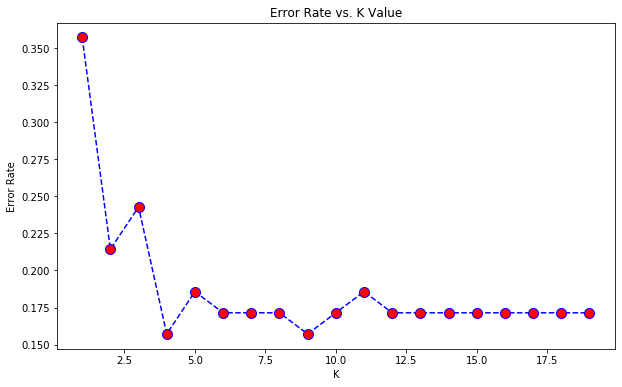

In [73]:
# We now plot it to check 
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From this result we can see that when K is 4 the result does not improve further hence the best k value is 4

In [74]:
# Now we train our model with K = 4
k = 4
knn_model_final = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
prediction_result = knn_model_final.predict(x_test)

In [76]:
# Checking our prediction results with the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_result)
cm

array([[57,  1],
       [10,  2]], dtype=int64)

In [77]:
# Checking our report 
from sklearn.metrics import classification_report,confusion_matrix
classification_report(y_test,prediction_result)

'              precision    recall  f1-score   support\n\n           0       0.85      0.98      0.91        58\n           1       0.67      0.17      0.27        12\n\n    accuracy                           0.84        70\n   macro avg       0.76      0.57      0.59        70\nweighted avg       0.82      0.84      0.80        70\n'

In [97]:
# Checking our Model Accuracy 
def accuracy(x):
    train_accuracy = round(x.score(x_train,y_train) * 100,2)
    test_accuracy = round(x.score(x_test, y_test)* 100,2)
    print("Train Data Accuracy:", train_accuracy)
    print("Test Data Accuracy:" , test_accuracy)
    
accuracy(knn_model_final)

Train Data Accuracy: 75.0
Test Data Accuracy: 84.29


**DECISION TREE**

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [99]:
# Making Prediction 
dt_prediction_result = dt.predict(x_test)
# Checking our prediction results with the Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_prediction_result)
dt_cm

array([[43, 15],
       [10,  2]], dtype=int64)

In [101]:
# Check Report 
classification_report(y_test,dt_prediction_result)

'              precision    recall  f1-score   support\n\n           0       0.81      0.74      0.77        58\n           1       0.12      0.17      0.14        12\n\n    accuracy                           0.64        70\n   macro avg       0.46      0.45      0.46        70\nweighted avg       0.69      0.64      0.67        70\n'

In [102]:
# Accuracy
accuracy(dt)

Train Data Accuracy: 85.87
Test Data Accuracy: 64.29


From this we can see that our model is OVERFITTING

**SUPPORT VECTOR MACHINE**





In [103]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0) 
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [106]:
# Making predictions
svm_prediction = svm.predict(x_test)
# Checking our prediction results with the Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_prediction)
svm_cm

array([[58,  0],
       [12,  0]], dtype=int64)

In [107]:
# Check Report 
classification_report(y_test,svm_prediction)

C:\Users\Boss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91        58\n           1       0.00      0.00      0.00        12\n\n    accuracy                           0.83        70\n   macro avg       0.41      0.50      0.45        70\nweighted avg       0.69      0.83      0.75        70\n'

In [108]:
# Accuracy
accuracy(svm)

Train Data Accuracy: 73.19
Test Data Accuracy: 82.86


**LOGISTIC REGRESSION**

In [109]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
# Predicting the Test set results
lr_prediction = lr.predict(x_test)
# Checking our prediction results with the Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_prediction)
lr_cm

array([[58,  0],
       [12,  0]], dtype=int64)

In [111]:
# Check Report 
classification_report(y_test,lr_prediction)

C:\Users\Boss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91        58\n           1       0.00      0.00      0.00        12\n\n    accuracy                           0.83        70\n   macro avg       0.41      0.50      0.45        70\nweighted avg       0.69      0.83      0.75        70\n'

In [112]:
# Accuracy
accuracy(lr)

Train Data Accuracy: 73.55
Test Data Accuracy: 82.86


# MODEL EVALUATION SUMMARY

In [113]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

**KNN**

In [132]:
print("KNN Jaccard index:",jaccard_similarity_score(y_test,prediction_result))
print("KNN F1-Score:",f1_score(y_test, prediction_result, average='weighted'))

KNN Jaccard index: 0.8428571428571429
KNN F1-Score: 0.8013714285714285


**DECISION TREE**

In [133]:
prediction = dt_prediction_result
print("DECESION TREE Jaccard index:",jaccard_similarity_score(y_test,prediction))
print("DECESION TREE F1-Score:",f1_score(y_test, prediction, average='weighted'))

DECESION TREE Jaccard index: 0.6428571428571429
DECESION TREE F1-Score: 0.6656015621532863


**SVM**

In [135]:
prediction = svm_prediction
print("SVM Jaccard index:",jaccard_similarity_score(y_test,prediction))
print("SVM TREE F1-Score:",f1_score(y_test, prediction, average='weighted'))

SVM Jaccard index: 0.8285714285714286
SVM TREE F1-Score: 0.7508928571428571


**LOGISTIC REGRESSION**

In [137]:
prediction = lr_prediction
print("LOGISTIC REGRESSION Jaccard index:",jaccard_similarity_score(y_test,prediction))
print("LOGISTIC REGRESSION F1-Score:",f1_score(y_test, prediction, average='weighted'))
print("LOGISTIC REGRESSION LogLoss", log_loss(y_test, prediction))

LOGISTIC REGRESSION Jaccard index: 0.8285714285714286
LOGISTIC REGRESSION F1-Score: 0.7508928571428571
LOGISTIC REGRESSION LogLoss 5.920933096270403
